In [1]:
import numpy as np
from scipy import integrate 
import matplotlib.pyplot as plt
from shapely.geometry import LineString

In [124]:
h = 0.1
Es = np.linspace(0, 100, 1000)

In [125]:
def pdx(x, E):
    return np.sqrt(2*E - x**2 - x**4/2)

def borzom_righth(n):
    return 2 * np.pi * h * (n+0.5)

def calc_lim(E):
    return -np.sqrt(-1 + np.sqrt(1+4*E)), np.sqrt(-1 + np.sqrt(1+4*E)) 

# def parametrized_pdx(phi, E):
#     num = (4*E + 1) * np.cos(phi)**2
#     den = 4 * np.sqrt(np.sqrt(4*E+1)*np.sin(phi)-1)
#     return num/den

In [126]:
integrals = []
for E in Es:
    lim0, lim1 = calc_lim(E)
    integral = integrate.quad(pdx, lim0, lim1, args=E)
    integrals.append(integral)
    
integrals = np.array(integrals)

[0.9424777960769379,
 1.5707963267948966,
 2.199114857512855,
 2.827433388230814,
 3.4557519189487724,
 4.084070449666731,
 4.71238898038469,
 5.340707511102648,
 5.969026041820607,
 6.5973445725385655,
 7.225663103256524,
 7.853981633974483,
 8.482300164692441,
 9.1106186954104,
 9.738937226128359,
 10.367255756846317,
 10.995574287564276,
 11.623892818282235,
 12.252211349000193,
 12.880529879718152,
 13.50884841043611,
 14.137166941154069,
 14.765485471872028,
 15.393804002589986,
 16.022122533307943,
 16.650441064025905,
 17.27875959474386,
 17.907078125461823,
 18.535396656179778,
 19.16371518689774,
 19.792033717615695,
 20.420352248333657,
 21.048670779051612,
 21.676989309769574,
 22.30530784048753,
 22.93362637120549,
 23.561944901923447,
 24.19026343264141,
 24.818581963359364,
 25.446900494077326,
 26.07521902479528,
 26.703537555513243,
 27.3318560862312,
 27.96017461694916,
 28.588493147667116,
 29.216811678385078,
 29.845130209103033,
 30.473448739820995,
 31.101767270538

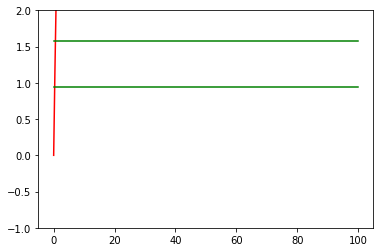

In [127]:
ax = plt.axes()
ax.set_ylim([-1, 2])

fitted_Es = []
ns = list(range(1, 100))
f = integrals[:, 0]

plt.plot(Es, f, 'r')

for n in ns:
    g = [borzom_righth(n) for _ in Es]
    plt.plot(Es, g, 'g')
    first_line = LineString(np.column_stack((Es, f)))
    second_line = LineString(np.column_stack((Es, g)))
    intersection = first_line.intersection(second_line)
    
    fitted_Es.append(intersection.xy[1][0])
    
fitted_Es

In [128]:
def V(x):
    return x**2/2 + x**4/4

def p(x):
    return np.sqrt(2*(E - V(x)))

def t1(x):
    return integrate.quad(lambda y: 1/p(y), 0, x)[0]

def J(x):
    return p(x)

def S1(x):
    return integrate.quad(p, 0, x)[0]

def A(x):
    return np.exp(1j*(-x**2/2))

def psi_1(x):
    return A(x)/np.sqrt(J(x))*np.exp(1j*(S1(x)/h))

def psi_1_c(x):
    return 1/np.sqrt(J(x))*np.exp(1j*(S1(x)/h))

In [129]:
def S3(x):
    return 0.5*np.pi*h*(n+0.5) - S1(x)

def T(E):
    lim0, lim1 = calc_lim(E)
    return 2*integrate.quad(lambda y: 1/p(y), lim0, lim1)[0]

def t3(x):
    return T(E)/2 - t1(x)

def psi_3(x):
    return np.exp(1j*np.pi/2)*A(x)/np.sqrt(J(x))*np.exp(1j*(S3(x)/h))

In [130]:
n = 10
E = fitted_Es[n]
lim0, lim1 = calc_lim(E)
xs = np.linspace(lim0+h, lim1-h, 1000)
psis_1 = [psi_1(x) for x in xs]
psis_3 = [psi_3(x) for x in xs]
psis_1_c = [psi_1_c(x) for x in xs]
psis = [psis_1[i] + psis_3[i] for i in range(len(psis_1))]

In [131]:
RE_psis_1 = [x.real for x in psis_1]
IM_psis_1 = [x.imag for x in psis_1]

RE_psis_3 = [x.real for x in psis_3]
IM_psis_3 = [x.imag for x in psis_3]

RE_psis = [x.real for x in psis]
IM_psis = [x.imag for x in psis]

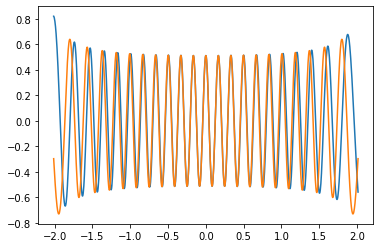

In [132]:
plt.plot(xs, RE_psis_1)
plt.plot(xs, [x.real for x in psis_1_c])

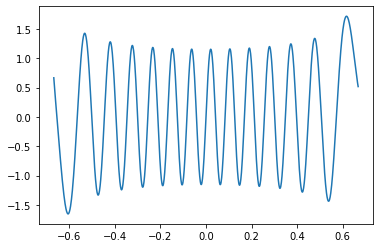

In [115]:
plt.plot(xs, IM_psis_1)

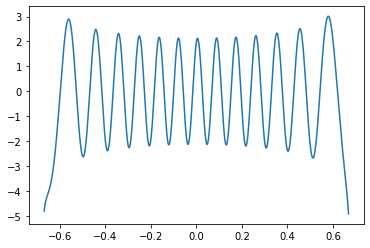

In [116]:
plt.plot(xs, RE_psis)